In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

# Insert path to mavenn beginning of path
import os
import sys
abs_path_to_mavenn = os.path.abspath('../../')
sys.path.insert(0, abs_path_to_mavenn)

# Load mavenn
import mavenn
print(mavenn.__path__)

['/Users/jkinney/github/mavenn/mavenn']


In [2]:
# Load example data
data_df = mavenn.load_example_dataset('mpsa')
data_df.head()

,training_set,y,dy,x
0,False,-3.751854,0.444200,AAAGCAAAA
1,True,-2.697741,0.369972,AAAGCAAAC
2,True,-2.242947,0.575121,AAAGCAAAG
3,False,-3.067251,0.357014,AAAGCAAAT
4,False,-2.987074,0.472637,AAAGCAACA


In [3]:
# Split into trianing and test data
ix = data_df['training_set']
L = len(data_df['x'][0])
train_df = data_df[ix]
print(f'training N: {len(train_df):,}')
test_df = data_df[~ix]
print(f'testing N: {len(test_df):,}')

training N: 17,498
testing N: 4,431


In [4]:
# Set seeed
mavenn.set_seed(0)

# Define model
model = mavenn.Model(regression_type='GE',
                     L=L,
                     alphabet='dna',
                     gpmap_type='pairwise',                     
                     ge_noise_model_type='SkewedT',
                     ge_heteroskedasticity_order=2)


In [5]:
# Set training data
model.set_data(x=train_df['x'],
               y=train_df['y'],
               shuffle=True)

N = 17,498 observations set as training data.
Data shuffled.
Time to set data: 0.36 sec.


In [6]:
# Fit model to data
history = model.fit(learning_rate=.005,
                    epochs=1000,
                    batch_size=200,
                    early_stopping=True,
                    early_stopping_patience=30)

 
LSMR            Least-squares solution of  Ax = b

The matrix A has    17498 rows  and       36 cols
damp = 0.00000000000000e+00

atol = 1.00e-06                 conlim = 1.00e+08

btol = 1.00e-06             maxiter =       36

 
   itn      x(1)       norm r    norm Ar  compatible   LS      norm A   cond A
     0  0.00000e+00  1.323e+02  4.299e+03   1.0e+00  2.5e-01
     1  2.19200e-02  1.200e+02  1.397e+03   9.1e-01  1.5e-01  7.7e+01  1.0e+00
     2  2.59784e-02  1.186e+02  7.118e+02   9.0e-01  5.2e-02  1.1e+02  1.1e+00
     3  2.96533e-02  1.184e+02  2.279e+02   9.0e-01  7.5e-03  2.6e+02  2.4e+00
     4  3.10860e-02  1.183e+02  5.410e+01   8.9e-01  1.7e-03  2.7e+02  3.1e+00
     5  3.20917e-02  1.183e+02  1.251e+01   8.9e-01  3.7e-04  2.8e+02  3.4e+00
     6  3.22692e-02  1.183e+02  1.248e+00   8.9e-01  3.7e-05  2.9e+02  3.5e+00
     7  3.22536e-02  1.183e+02  2.542e-01   8.9e-01  7.2e-06  3.0e+02  3.5e+00
     8  3.22424e-02  1.183e+02  6.790e-02   8.9e-01  1.9e-06  3.0e+02  3.5

70/70 [==============================] - 0s 4ms/step - loss: 130.6189 - I_like: 0.3414 - val_loss: 133.0290 - val_I_like: 0.3093
Epoch 49/1000
70/70 [==============================] - 0s 3ms/step - loss: 130.7033 - I_like: 0.3409 - val_loss: 135.5936 - val_I_like: 0.2916
Epoch 50/1000
70/70 [==============================] - 0s 4ms/step - loss: 130.8311 - I_like: 0.3398 - val_loss: 132.2664 - val_I_like: 0.3152
Epoch 51/1000
70/70 [==============================] - 0s 3ms/step - loss: 130.1519 - I_like: 0.3450 - val_loss: 136.9169 - val_I_like: 0.2834
Epoch 52/1000
70/70 [==============================] - 0s 4ms/step - loss: 131.0928 - I_like: 0.3383 - val_loss: 133.9698 - val_I_like: 0.3037
Epoch 53/1000
70/70 [==============================] - 0s 4ms/step - loss: 131.3551 - I_like: 0.3363 - val_loss: 132.7687 - val_I_like: 0.3122
Epoch 54/1000
70/70 [==============================] - 0s 3ms/step - loss: 130.0918 - I_like: 0.3456 - val_loss: 135.3517 - val_I_like: 0.2917
Epoch 55/1000

In [7]:
# Save model
model.save('mpsa_ge_pairwise')

Model saved to these files:
	mpsa_ge_pairwise.pickle
	mpsa_ge_pairwise.h5


In [8]:
# Load model
model = mavenn.load('mpsa_ge_pairwise')

Model loaded from these files:
	mpsa_ge_pairwise.pickle
	mpsa_ge_pairwise.h5


In [9]:
# Get x and y
x_test = test_df['x'].values
y_test = test_df['y'].values
dy_test = test_df['dy'].values

On test data:
I_like_test: 0.318 +- 0.032 bits
I_pred_test: 0.379 +- 0.014 bits
I_intrinsic: 0.783 +- 0.023 bits
percent info explained: 48.4% +- 2.3%


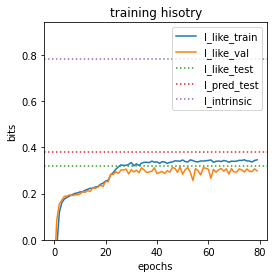

In [10]:
# Show training history
print('On test data:')

# Compute likelihood information
I_like, dI_like =  model.I_likelihood(x=x_test, y=y_test)
print(f'I_like_test: {I_like:.3f} +- {dI_like:.3f} bits') 

# Compute predictive information
I_pred, dI_pred = model.I_predictive(x=x_test, y=y_test)
print(f'I_pred_test: {I_pred:.3f} +- {dI_pred:.3f} bits')

# Compute intrinsic information
I_intr, dI_intr = mavenn.I_intrinsic(y_values=y_test, dy_values=dy_test)
print(f'I_intrinsic: {I_intr:.3f} +- {dI_intr:.3f} bits')

# Compute percent info explained
pct = 100*I_pred/I_intr
dpct = 100*np.sqrt((dI_pred/I_intr)**2 + (dI_intr*I_pred/I_intr**2)**2)
print(f'percent info explained: {pct:.1f}% +- {dpct:.1f}%')

I_like_hist = model.history['I_like']
val_I_like_hist = model.history['val_I_like']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_like_hist, label='I_like_train')
ax.plot(val_I_like_hist, label='I_like_val')
ax.axhline(I_like, color='C2', linestyle=':', label='I_like_test')
ax.axhline(I_pred, color='C3', linestyle=':', label='I_pred_test')
ax.axhline(I_intr, color='C4', linestyle=':', label='I_intrinsic')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')
ax.set_ylim([0, I_intr*1.2]);

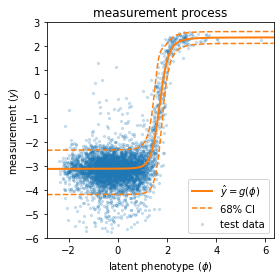

In [11]:
# Predict latent phentoype values (phi) on test data
phi_test = model.x_to_phi(x_test)

# Predict measurement values (yhat) on test data
yhat_test = model.x_to_yhat(x_test)

# Set phi lims and create grid in phi space
phi_lim = [min(phi_test)-.5, max(phi_test)+.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Compute yhat each phi gridpoint
yhat_grid = model.phi_to_yhat(phi_grid)

# Compute 90% CI for each yhat
q = [0.05, 0.95] #[0.16, 0.84]
yqs_grid = model.yhat_to_yq(yhat_grid, q=q)

# Create figure
fig, ax = plt.subplots(1, 1, figsize=[4, 4])

# Illustrate measurement process with GE curve
ax.scatter(phi_test, y_test, color='C0', s=5, alpha=.2, label='test data')
ax.plot(phi_grid, yhat_grid, linewidth=2, color='C1',
        label='$\hat{y} = g(\phi)$')
ax.plot(phi_grid, yqs_grid[:, 0], linestyle='--', color='C1', label='68% CI')
ax.plot(phi_grid, yqs_grid[:, 1], linestyle='--', color='C1')
ax.set_xlim(phi_lim)
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_ylabel('measurement ($y$)')
ax.set_title('measurement process')
ax.set_ylim([-6, 3])
ax.legend()

# Fix up plot
fig.tight_layout()
plt.show()

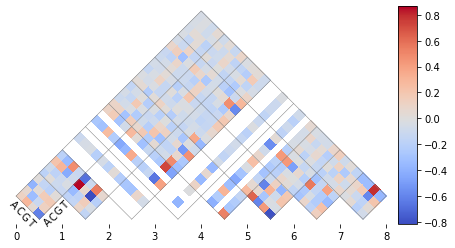

In [12]:
# Plot pairwise parameters
theta = model.get_theta()
fig, ax = plt.subplots(1, 1, figsize=[8, 4])
mavenn.heatmap_pairwise(values=theta['theta_lclc'],
                        alphabet=theta['alphabet'],
                        ax=ax);

In [13]:
# Test simulate_data
mavenn.set_seed(0)
sim_df = model.simulate_dataset(N=len(train_df))
mavenn.set_seed(1)
test_sim_df = model.simulate_dataset(N=len(test_df))
sim_df.head()

,training_set,yhat,phi,y,x
0,True,-3.111238,0.014435,-2.916901,GAAGCGTTA
1,True,-3.112235,-0.091699,-2.762508,GTGGTCAAA
2,True,-3.110996,0.036755,-3.371498,GTGGTTGCA
3,True,-3.113295,-0.238296,-3.835698,GTTGTTCGA
4,False,-3.106605,0.302595,-3.128052,CGTGTCTGA


In [14]:
# Set seeed
mavenn.set_seed(0)

# Define model
sim_model = mavenn.Model(regression_type='GE',
                     L=L,
                     alphabet='dna',
                     gpmap_type='pairwise',                     
                     ge_noise_model_type='SkewedT',
                     ge_heteroskedasticity_order=2)

# Set training data
sim_model.set_data(x=sim_df['x'],
                   y=sim_df['y'],
                   shuffle=True)

# Fit model to data
history = sim_model.fit(learning_rate=.005,
                        epochs=1000,
                        batch_size=200,
                        early_stopping=True,
                        early_stopping_patience=30)

N = 17,498 observations set as training data.
Data shuffled.
Time to set data: 0.351 sec.
 
LSMR            Least-squares solution of  Ax = b

The matrix A has    17498 rows  and       36 cols
damp = 0.00000000000000e+00

atol = 1.00e-06                 conlim = 1.00e+08

btol = 1.00e-06             maxiter =       36

 
   itn      x(1)       norm r    norm Ar  compatible   LS      norm A   cond A
     0  0.00000e+00  1.323e+02  4.433e+03   1.0e+00  2.5e-01
     1  8.31870e-03  1.196e+02  1.477e+03   9.0e-01  1.6e-01  7.8e+01  1.0e+00
     2  1.28323e-02  1.182e+02  9.722e+02   8.9e-01  7.1e-02  1.2e+02  1.1e+00
     3  1.29143e-02  1.177e+02  1.608e+02   8.9e-01  5.2e-03  2.6e+02  2.1e+00
     4  1.28139e-02  1.177e+02  2.753e+01   8.9e-01  8.5e-04  2.7e+02  2.5e+00
     5  1.32650e-02  1.177e+02  4.330e+00   8.9e-01  1.3e-04  2.8e+02  2.6e+00
     6  1.32638e-02  1.177e+02  1.384e+00   8.9e-01  4.1e-05  2.9e+02  2.9e+00
     7  1.32671e-02  1.177e+02  3.907e-01   8.9e-01  9.0e-06  3

70/70 [==============================] - 0s 4ms/step - loss: 123.4854 - I_like: 0.4651 - val_loss: 122.7529 - val_I_like: 0.4632
Epoch 49/1000
70/70 [==============================] - 0s 4ms/step - loss: 125.0029 - I_like: 0.4539 - val_loss: 122.8631 - val_I_like: 0.4620
Epoch 50/1000
70/70 [==============================] - 0s 4ms/step - loss: 124.1599 - I_like: 0.4601 - val_loss: 121.6471 - val_I_like: 0.4701
Epoch 51/1000
70/70 [==============================] - 0s 4ms/step - loss: 123.2351 - I_like: 0.4669 - val_loss: 122.0980 - val_I_like: 0.4659
Epoch 52/1000
70/70 [==============================] - 0s 4ms/step - loss: 123.7670 - I_like: 0.4630 - val_loss: 122.8581 - val_I_like: 0.4603
Epoch 53/1000
70/70 [==============================] - 0s 4ms/step - loss: 124.4162 - I_like: 0.4585 - val_loss: 122.5468 - val_I_like: 0.4617
Epoch 54/1000
70/70 [==============================] - 0s 3ms/step - loss: 123.9478 - I_like: 0.4618 - val_loss: 121.8762 - val_I_like: 0.4670
Training time

On test data:
I_like_test: 0.427 +- 0.035 bits
I_pred_test: 0.446 +- 0.014 bits
I_intrinsic: 0.463 +- 0.032 bits


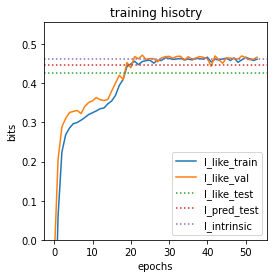

In [15]:
# Show training history
print('On test data:')

x_test = test_sim_df['x'].values
y_test = test_sim_df['y'].values

# Compute likelihood information
I_like, dI_like =  sim_model.I_likelihood(x=x_test, y=y_test)
print(f'I_like_test: {I_like:.3f} +- {dI_like:.3f} bits') 

# Compute predictive information
I_pred, dI_pred = sim_model.I_predictive(x=x_test, y=y_test)
print(f'I_pred_test: {I_pred:.3f} +- {dI_pred:.3f} bits')

# Compute the intrinsic information, which is the likelihood information of the true mdoel
I_intr, dI_intr = model.I_likelihood(x=x_test, y=y_test)
print(f'I_intrinsic: {I_intr:.3f} +- {dI_intr:.3f} bits')

# Get history
I_like_hist = sim_model.history['I_like']
val_I_like_hist = sim_model.history['val_I_like']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_like_hist, label='I_like_train')
ax.plot(val_I_like_hist, label='I_like_val')
ax.axhline(I_like, color='C2', linestyle=':', label='I_like_test')
ax.axhline(I_pred, color='C3', linestyle=':', label='I_pred_test')
ax.axhline(I_intr, color='C4', linestyle=':', label='I_intrinsic')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')
ax.set_ylim([0, max([I_intr, I_like, I_pred])*1.2]);

# FUCK. This doesn't make sense. Why is intrinsic information lower than predictive? Or likelihood!?

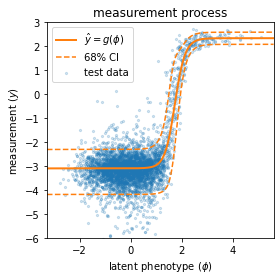

In [16]:
# Predict latent phentoype values (phi) on test data
phi_test = sim_model.x_to_phi(x_test)

# Predict measurement values (yhat) on test data
yhat_test = sim_model.x_to_yhat(x_test)

# Set phi lims and create grid in phi space
phi_lim = [min(phi_test)-.5, max(phi_test)+.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Compute yhat each phi gridpoint
yhat_grid = sim_model.phi_to_yhat(phi_grid)

# Compute 90% CI for each yhat
q = [0.05, 0.95] #[0.16, 0.84]
yqs_grid = sim_model.yhat_to_yq(yhat_grid, q=q)

# Create figure
fig, ax = plt.subplots(1, 1, figsize=[4, 4])

# Illustrate measurement process with GE curve
ax.scatter(phi_test, y_test, color='C0', s=5, alpha=.2, label='test data')
ax.plot(phi_grid, yhat_grid, linewidth=2, color='C1',
        label='$\hat{y} = g(\phi)$')
ax.plot(phi_grid, yqs_grid[:, 0], linestyle='--', color='C1', label='68% CI')
ax.plot(phi_grid, yqs_grid[:, 1], linestyle='--', color='C1')
ax.set_xlim(phi_lim)
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_ylabel('measurement ($y$)')
ax.set_title('measurement process')
ax.set_ylim([-6, 3])
ax.legend()

# Fix up plot
fig.tight_layout()
plt.show()

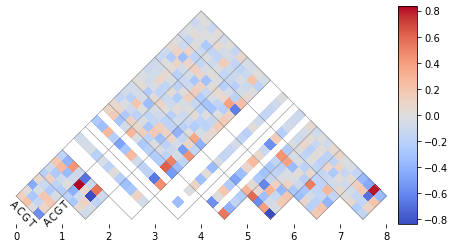

In [17]:
# Plot pairwise parameters
theta = sim_model.get_theta()
fig, ax = plt.subplots(1, 1, figsize=[8, 4])
mavenn.heatmap_pairwise(values=theta['theta_lclc'],
                        alphabet=theta['alphabet'],
                        ax=ax);